# 12. Hierarchical Clustering  
**Author**: Your Name  
**Date**: June 9, 2025  

## Introduction

Hierarchical Clustering is an unsupervised learning algorithm that builds a **tree-like structure (dendrogram)** to represent nested groupings of data points. Unlike K-Means, it does **not require pre-specifying `k`** (number of clusters). Instead, a user can "cut" the dendrogram at any level to determine the desired number of clusters.

### Types:
- **Agglomerative (Bottom-up)**: Starts with each point as a separate cluster and merges them.
- **Divisive (Top-down)**: Starts with one large cluster and splits it.

This notebook focuses on **Agglomerative Clustering**.

- **Type**: Unsupervised Learning  
- **Task**: Clustering  
- **Goal**: Build a hierarchy of clusters (dendrogram).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import scipy.cluster.hierarchy as sch

sns.set_style('whitegrid')


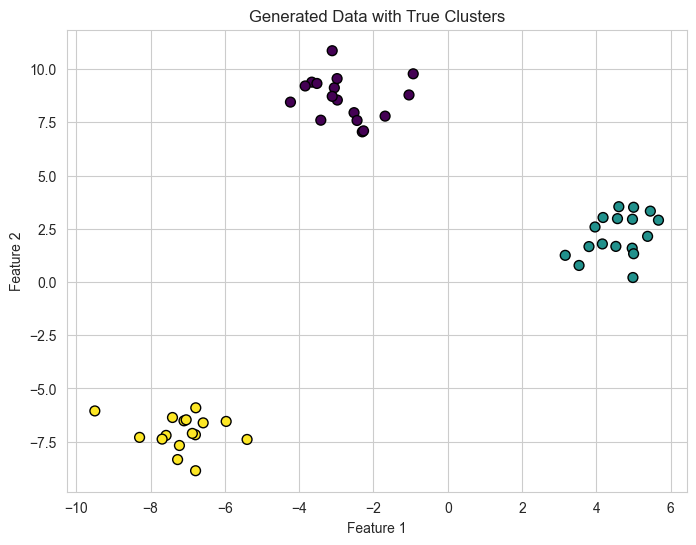

In [2]:
# Generate 3-cluster data
X_blobs, y_blobs_true = make_blobs(
    n_samples=50,
    centers=3,
    cluster_std=1.0,
    random_state=42,
    n_features=2
)

# Convert to DataFrame
X_blobs_df = pd.DataFrame(X_blobs, columns=['Feature1', 'Feature2'])

# Visualise original blobs
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs_df['Feature1'], X_blobs_df['Feature2'], c=y_blobs_true, cmap='viridis', edgecolor='k', s=50)
plt.title('Generated Data with True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_blobs_df)

# Back to DataFrame for convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=X_blobs_df.columns)


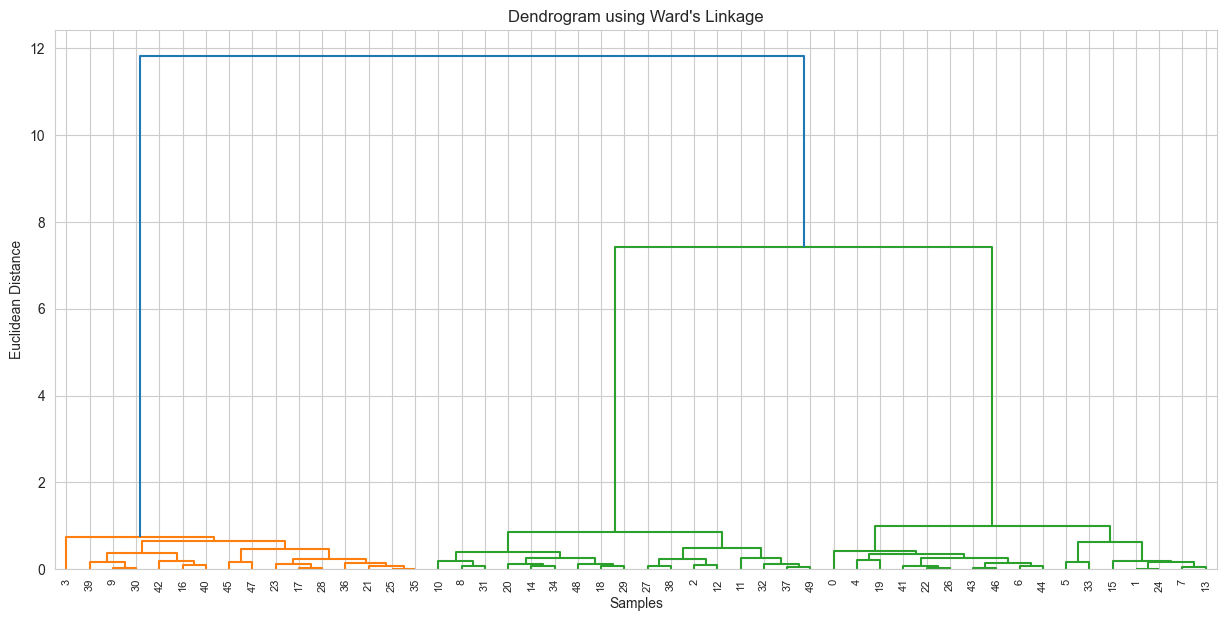

In [4]:
plt.figure(figsize=(15, 7))
plt.title("Dendrogram using Ward's Linkage")
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')

# Build linkage matrix and dendrogram
dendrogram = sch.dendrogram(sch.linkage(X_scaled_df, method='ward'))
plt.show()


### Dendrogram Interpretation

Cut the dendrogram horizontally where the longest vertical distance occurs without intersecting branches. This determines the optimal number of clusters — for our example, **3**.


In [5]:
n_clusters_value = 3

agg_cluster_model = AgglomerativeClustering(
    n_clusters=n_clusters_value,
    linkage='ward'
)

cluster_labels = agg_cluster_model.fit_predict(X_scaled_df)

# Add labels to DataFrames
X_blobs_df['HCluster'] = cluster_labels
X_scaled_df['HCluster'] = cluster_labels

print(f"Hierarchical Clustering model trained with k={n_clusters_value}.")
print(f"\nFirst 5 records:\n{X_scaled_df.head()}")


Hierarchical Clustering model trained with k=3.

First 5 records:
   Feature1  Feature2  HCluster
0 -0.294407  1.460832         0
1 -0.128869  0.871178         0
2  0.986540 -0.026199         2
3 -1.599085 -1.157188         1
4 -0.356964  0.955848         0


In [6]:
silhouette_avg = metrics.silhouette_score(X_scaled_df.drop('HCluster', axis=1), cluster_labels)
print(f"\nSilhouette Score for k={n_clusters_value}: {silhouette_avg:.3f}")



Silhouette Score for k=3: 0.856


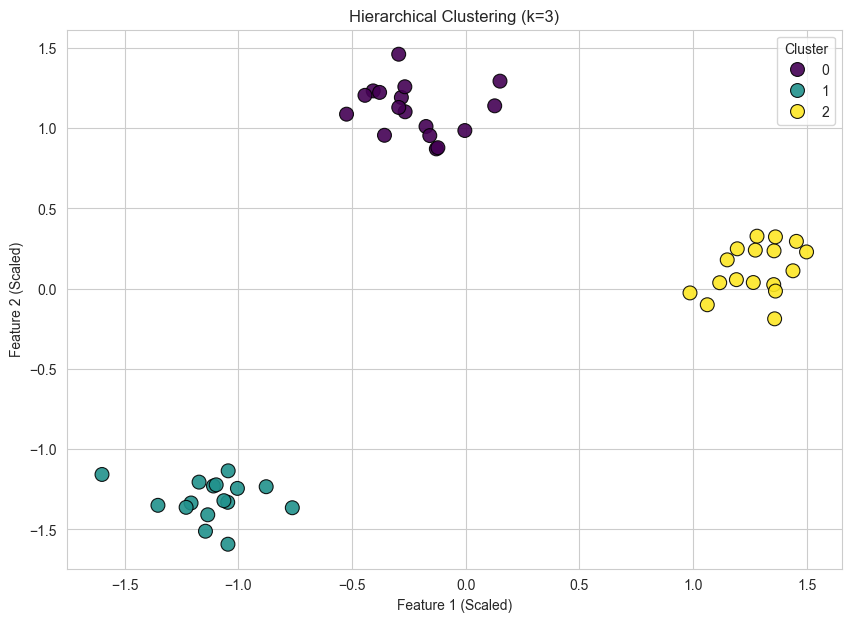

In [7]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=X_scaled_df,
    x='Feature1',
    y='Feature2',
    hue='HCluster',
    palette='viridis',
    s=100,
    edgecolor='k',
    alpha=0.9
)

plt.title(f'Hierarchical Clustering (k={n_clusters_value})')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## Conclusion & Key Takeaways

- Hierarchical Clustering builds a nested hierarchy of clusters using a tree structure called a dendrogram.
- **Agglomerative Clustering** (bottom-up) is most common.
- No need to pre-specify the number of clusters; the dendrogram helps identify it.
- **Linkage criteria** (Ward, complete, average, single) significantly affect results.
- Suitable for small datasets; computationally intensive for large ones.
- Ideal when the **hierarchical relationship** among data is important.

## Further Reading

- [Scikit-learn AgglomerativeClustering Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)  
- [SciPy Dendrogram Documentation](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)  
- *An Introduction to Statistical Learning* — Chapter on Clustering  
- [StatQuest: Hierarchical Clustering Explained](https://www.youtube.com/watch?v=7xHsRkOdVwo)
